<a href="https://colab.research.google.com/github/dowonshun/machine_learning/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

print (tf.__version__)

2.18.0


In [14]:
# Colab /content/gdrive/에 Google Drive mount함
from google.colab import drive


drive.mount('/content/gdrive/')
#인증과정 거침

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [15]:
import os
working_dir='dataset'

# Google Drive에서 Colab Default Directory
#Google Drive 마운트
colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks'
#save current dir
original_dir = os.getcwd()

try:
  #Colab drive 기본 directory로 이동
  os.chdir(colab_default_dir)
  if not os.path.isdir(working_dir):
    os.mkdir(working_dir)

  #change working dir
  os.chdir(working_dir)
  print('current dir =', os.getcwd())
except Exception as err:
  os.chdir(original_dir)
  print (err)

current dir = /content/gdrive/My Drive/Colab Notebooks/dataset


In [16]:
import numpy as np
# 살재 diabetes.csv 형태의 datafile이 /dataset에 저장되어 있다.
try:
  load_data = np.loadtxt('./diabetes.csv', delimiter = ',')

  x_data = load_data[:, 0:-1] #마지막 열을 제외한 모든행
  y_data = load_data[:, [-1]] #마지막 열을 선택 벡터로 유지

  print (x_data.shape, y_data.shape)
except Exception as err:
  print (str(err))

(759, 8) (759, 1)


In [17]:
#모델구축
model = Sequential()

model.add(Dense(y_data.shape[1],
          input_shape=(x_data.shape[1],), activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
#모델컴파일
model.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])
model.summary()
#                                                     손실함수              측정지

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist=model.fit(x_data, y_data, epochs=100, validation_split=0.2, verbose=2)

In [21]:
#모델 정확도 평가 [손실값, 정확도]
model.evaluate(x_data, y_data)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7365 - loss: 0.5412 


[0.5254639387130737, 0.748353123664856]

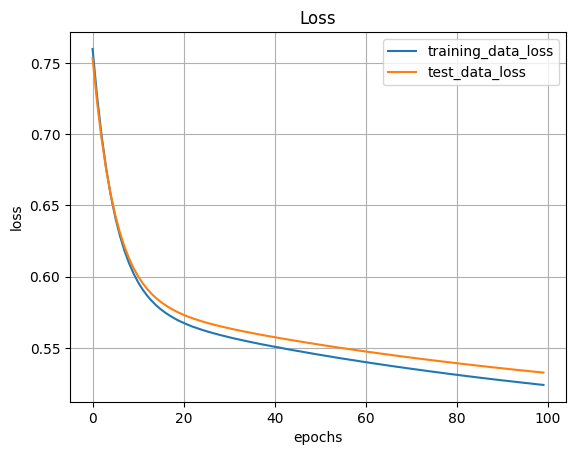

In [25]:
#손실값에 관한 그림
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training_data_loss')
plt.plot(hist.history['val_loss'], label='test_data_loss')
plt.legend(loc='best')

plt.show()

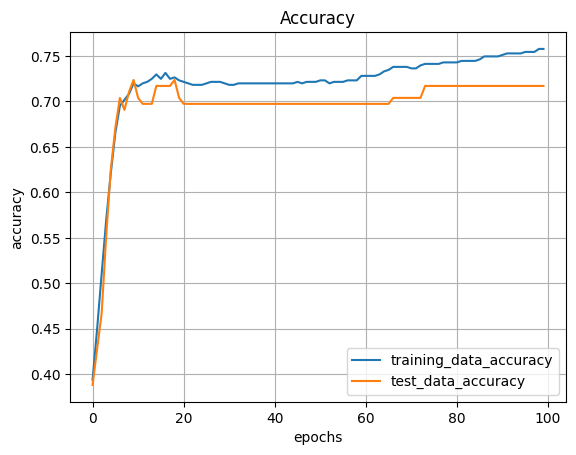

In [24]:
# 정확도에 관한 그림
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training_data_accuracy')
plt.plot(hist.history['val_accuracy'], label='test_data_accuracy')

plt.legend(loc='best')
plt.show()